In [308]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate

import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [309]:
from matplotlib import rc
rc("animation", html = "jshtml")

In [594]:
#parametros
g = 9.8 #m/s^2
m = 0.082 #kg
M = 0.194 #kg
l = 0.07 #m
mu = 0
b= 0.5
I = ((M/12)*(pow(l,2) + pow(0.02,2))+ M*pow(l/3,2))
tiempo = 10 #s
puntos = int(tiempo*200)
theta_0 = 0



In [598]:
#ecuaciones
def ecuacion_mov(t, w, g, l, m, M, mu, b, I):
    theta, omega, x, xdot = w
    F1=omega
    F2= xdot
    f1= (-(m*g*l*np.sin(theta)-(b*omega))(M+m) - (m*l*np.cos(theta)(m*l*pow(omega,2)np.sin(theta)-(mu*M*g))))/(m*pow(l,2)+I)(M+m)-pow(m*l*np.cos(theta),2)
    f2= (-m*l*np.cos(theta)(m*g*l*np.sin(theta)-(b*omega)) - (m*l*pow(omega,2)*np.sin(theta)-(mu*M*g))(m*pow(l,2) + I))/(m*pow(l,2)+I)*(M+m)-pow(m*l*np.cos(theta),2)
    return [F1,F2,f1,f2]

SyntaxError: invalid syntax (<ipython-input-598-6800817bb006>, line 6)

In [599]:
def solucion_ecuaciones(cond_ini, g, l, m, M, mu,b,I,time, puntos):
    t = np.linspace(0, time, puntos)
    args = (g, l, m, M, mu,b, I)
    sol = integrate.solve_ivp(ecuacion_mov,[0,time],cond_ini,'DOP853',t,args=args)
    return sol

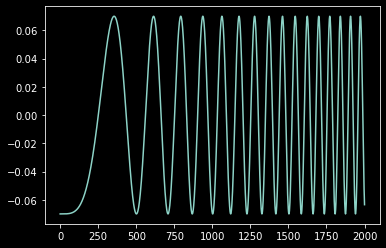

In [600]:
def polares_a_catesianas(soluciones, l):
    x2 = soluciones[1,:]
    y2 = np.zeros(soluciones[1,:].shape[0])
    x1 = x2 - l * np.sin(soluciones[0,:])
    y1 = - l * np.cos(soluciones[0,:])
    return np.array([x1, y1,x2,y2])
cond_ini = np.array([0,0,0,2])
sol = solucion_ecuaciones(cond_ini,g, l, m, M, mu,b, I, tiempo,puntos)
data = polares_a_catesianas(sol.y, l)
x= np.linspace(0,data[1,:].shape[0],data[1,:].shape[0])
plt.plot(x,data[1,:])

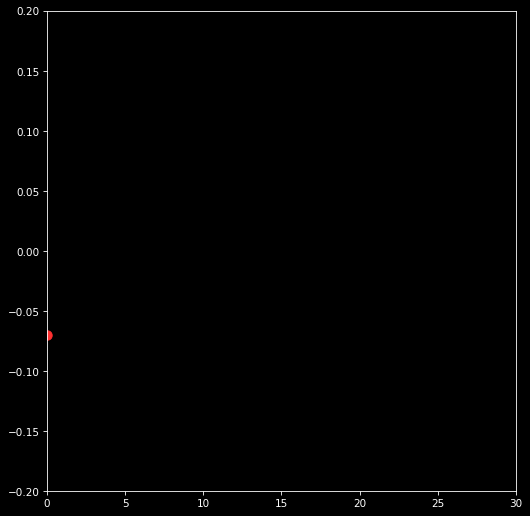

In [601]:
fps = 24
def update(num_frame,d,elements,paso):
    j = num_frame * paso
    masa, trayectoria = elements
    masa.set_offsets(d[[0,1],[j,j+1]].T)
    trayectoria.set_data(d[[0,1],[j,j+1]])
    return masa,trayectoria

def inicializar_elementos_graficos(d,m,ax):
    masa = ax.scatter(d[0, :1], d[1, :1] ,s=80,c='#ff3030')
    trayectoria, = ax.plot(d[0, :1], d[1, :1],c='#ff3030', zorder=-1)
    return masa, trayectoria
def ajustar_ejes_coordenados(l):
    fig = plt.figure(figsize = (7,7), dpi = 75)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1) #margen
    ax = fig.gca()
    plt.tight_layout()
    plt.ylim([-0.2, 0.2])
    plt.xlim([0, 30])
    return fig, ax
def crear_animacion(data, l, m, time, fps, name):
    N = time*fps
    paso = int(np.floor(data.shape[1] / N))
    if paso<1: raise ValueError('Escoje puntos > '+ str(N))
    fig, ax = ajustar_ejes_coordenados(l)
    elements = inicializar_elementos_graficos(data,m,ax)
    ani = animation.FuncAnimation(fig,update,N,fargs=(data,elements,paso))
    return ani
start_time = time.time()
crear_animacion(data,l,m,tiempo,fps,'pendulo_doble.gif')